##### The Objective:,
    Indentify Patterns of appliance from UCI ,
    Individual household electric power consumption Data Set,
    https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption,
    ##### Version 1,
    ##### 10/02/2020
    
    Create Data frame for the task of find patterns in the data

##### Load Data set


In [1]:
import pandas as pd

UCI_IHC_DF = pd.read_csv('C:/Users/pe-cb\\Documents/Projects-onJupyterN/EnergyConsumption_detectApliance/Data/household_power_consumption/household_power_consumption.txt',
                             sep = ';', # is separeted by 
                             header = 0,
                             na_filter=True,
                             na_values= '?') # Nan is ? in the data set

In [2]:
print(UCI_IHC_DF.dtypes)
print(UCI_IHC_DF.columns)
UCI_IHC_DF.isnull().sum()
print("Attribute Information: \n 1.date:.Date in format dd/mm/yyyy \n 2.time: time in format hh:mm:ss \n 3.global_active_power: household global minute-averaged active power (in kilowatt) \n 4.global_reactive_power: household global minute-averaged reactive power (in kilowatt) \n 5.voltage: minute-averaged voltage (in volt) \n 6.global_intensity: household global minute-averaged current intensity (in ampere) \n 7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy).\n It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).\n 8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy).\n It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light. \n 9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy).\n It corresponds to an electric water-heater and an air-conditioner."),
UCI_IHC_DF.head()

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object
Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')
Attribute Information: 
 1.date:.Date in format dd/mm/yyyy 
 2.time: time in format hh:mm:ss 
 3.global_active_power: household global minute-averaged active power (in kilowatt) 
 4.global_reactive_power: household global minute-averaged reactive power (in kilowatt) 
 5.voltage: minute-averaged voltage (in volt) 
 6.global_intensity: household global minute-averaged current intensity (in ampere) 
 7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy).
 It corresponds to

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


##### Create a Date Time column where date + time columns are mixed for time series

In [3]:
UCI_IHC_DF['DateTime'] = UCI_IHC_DF['Date'].str.cat(UCI_IHC_DF['Time'], sep=' ') # is possible to cat multiple columns 
UCI_IHC_DF.drop(['Date', 'Time'], axis=1, inplace=True)

##### Define DataTime as index and as a time series object

In [4]:
UCI_IHC_DF['DateTime'] = pd.to_datetime(UCI_IHC_DF['DateTime'], format='%d/%m/%Y %H:%M:%S', dayfirst=True)
UCI_IHC_DF.set_index('DateTime',inplace=True)

# exclude NAN

UCI_IHC_DF.dropna(inplace=True,axis=0)

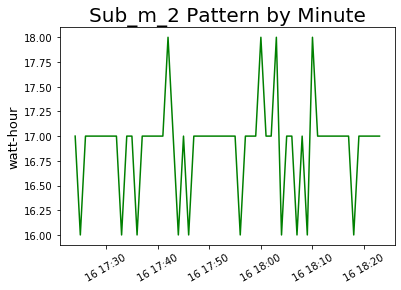

In [5]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
plt.plot_date(UCI_IHC_DF.index[0:60], UCI_IHC_DF.Sub_metering_3.iloc[0:60],fmt='-g' )
ax.xaxis.set_tick_params(rotation=30, labelsize=10)
ax.set_ylabel('watt-hour',fontdict={'fontsize': 13})
plt.title('Sub_m_2 Pattern by Minute', fontdict={'fontsize': 20})
plt.show()

##### The idea

My idea is to create a model that will use the last minutes from the data to find predict the patterns in the data

For that I need to create a data frame where the each minute is store in a different columns

In [6]:
import numpy as np
from itertools import cycle

# Create the empty data frame

subm2_pattern_df = pd.DataFrame(columns= range(0,30), index=range(0,24*30*3))

# Control the row in the empty data frame

row60 = 0

for obs, column in zip(range(0,(24*60*30*3)), cycle(range(0,30))): # go togheter the size of the data frame + every one of the columns
    if obs%60 == 0 and obs != 0 :
        row60 += 1
    subm2_pattern_df.iloc[row60,column] = UCI_IHC_DF.Sub_metering_3.iloc[obs]
    

In [7]:
subm2_pattern_df.to_csv('~\Documents\Projects-onJupyterN\EnergyConsumption_detectApliance\Data\subm3_pattern.csv', sep=',')